# Content Based 3d Model Retrieval

### How are voxels counted? 
http://vision.princeton.edu/projects/2014/3DShapeNets/paper.pdf

```
To study 3D shape representation, we propose to represent
a geometric 3D shape as a probability distribution of
binary variables on a 3D voxel grid. Each 3D mesh is represented
as a binary tensor: 1 indicates the voxel is inside the
mesh surface, and 0 indicates the voxel is outside the mesh
(i.e., it is empty space). The grid size in our experiments is
30 × 30 × 30.
```

##### Handling OFF file format

http://www.geomview.org/docs/html/OFF.html

# Preprocess the data

See binvox_converter.py

### plotting voxels in matplotlib

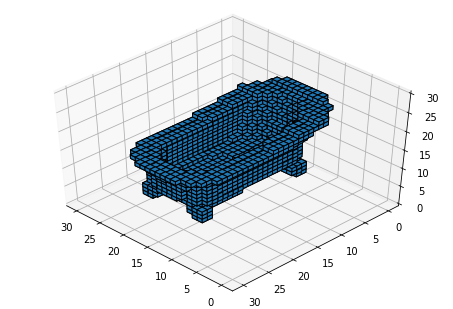

In [2]:
import matplotlib.pyplot as plt
from plots import plot_vox_file
%matplotlib inline


plot_vox_file('./ModelNet10/bathtub/train/bathtub_0005.binvox')

# Evaluate class balance for ModelNet10 and ModelNet40

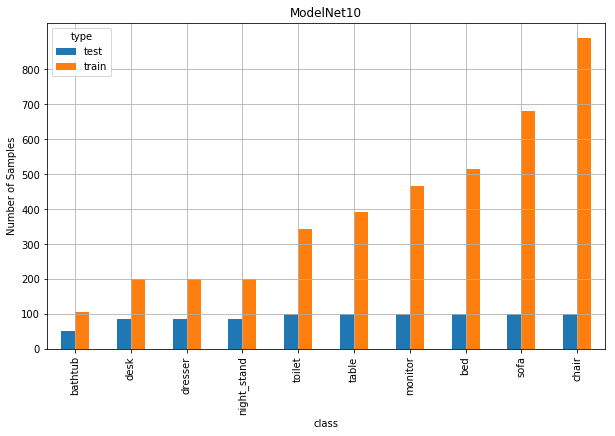

type,test,train
class,,
bathtub,50,106
desk,86,200
dresser,86,200
night_stand,86,200
toilet,100,344
table,100,392
monitor,100,465
bed,100,515
sofa,100,680


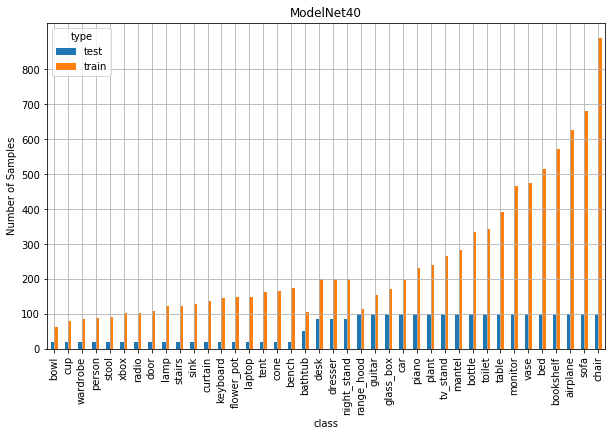

type,test,train
class,,
bowl,20,64
cup,20,79
wardrobe,20,87
person,20,88
stool,20,90
xbox,20,103
radio,20,104
door,20,109
lamp,20,124


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from count_files import (make_file_description_data_frame,
                         plot_class_balance)

df = make_file_description_data_frame('./ModelNet10/', show_missed=False)
plot_class_balance(df, 'ModelNet10')

df = make_file_description_data_frame('./ModelNet40/', show_missed=False)
plot_class_balance(df, 'ModelNet40')

# Can we run a really simple neural network against bathtub and chair?

### Running model

In [9]:
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential


model = Sequential()
model.add(Conv3D(5, (5, 5, 5), strides=1,
                 padding='same',
                 activation='relu',
                 input_shape=(30, 30, 30, 1)))
model.add(MaxPooling3D((5, 5, 5), padding='same'))
model.add(Conv3D(10, (7, 7, 7), strides=1,
                 padding='same',
                 activation='relu'))
# model.add(GlobalAveragePooling2D())
model.add(MaxPooling3D((3, 3, 3), 1))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

### TODO: Define your architecture.

model.summary()
model.compile('sgd', 'categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_9 (Conv3D)            (None, 30, 30, 30, 10)    1260      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 6, 6, 6, 10)       0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 6, 6, 6, 20)       68620     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 4, 4, 4, 20)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2562      
Total params: 72,442
Trainable params: 72,442
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.callbacks import TensorBoard

model.fit(data, labels,
          epochs=1,
          batch_size=32,
          shuffle=True,
          validation_split=.1,
          callbacks=[TensorBoard(log_dir='./tensor_board.log')])

Train on 1030 samples, validate on 115 samples
Epoch 1/1
1030/1030 [==============================] - 263s 255ms/step - loss: 0.0869 - acc: 0.9194 - val_loss: 0.9551 - val_acc: 0.0000e+00


In [11]:
lookup = {1: 'chair', 0: 'bathtub'}

In [7]:
loc = 400
probs = model.predict(data[loc:loc+1])
lookup[np.argmax(probs)], plot_vox(data[loc].reshape(30, 30, 30))

NameError: name 'model' is not defined

# Appendix:

In [1]:
from data import load_data

In [2]:
(x_train, y_train), (x_test, y_test), target_names = load_data('./ModelNet10/')